[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [5]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [9]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age', 
        'Pregnancies_high', 'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [10]:
y = df['Outcome']
y.shape

(768,)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [14]:
X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

### 최적의 max_depth 값 찾기

In [45]:
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [47]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': range(3, 12), 'max_features': [0.3, 0.5, 0.7, 0.9, 1]}  # 시도해볼 parameter들의 범위
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [48]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [49]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [50]:
clf.best_score_

0.8664934026389444

In [54]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.015770,0.010327,0.005796,0.002915,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.023352,0.016946,0.005673,0.001800,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.017136,0.011059,0.010081,0.007314,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.012393,0.002043,0.004338,0.000481,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.008599,0.001021,0.004803,0.001600,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [55]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [57]:
clf.score(X_test, y_test)

0.8701298701298701

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [96]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = np.random.randint(3, 10, 10)
max_features = np.random.uniform(0.7, 0.8, 100)
param_distributions = {"max_depth" : max_depth, "max_features" : max_features,
                      "min_samples_split": list(range(4, 6))}
clf = RandomizedSearchCV(model, param_distributions, n_iter=1000,
                   scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([5, 6, 3, 9, 8, 5, 4, 6, 9, 5]),
                                        'max_features': array([0.72766484, 0.78348678, 0.71675058, 0.76084828, 0.74891084,
       0.73167655, 0.73124316, 0.78218304, 0.7678298 , 0.79102954,
       0.72476524, 0.71669794, 0.79763802, 0.78598077, 0.77777917,
       0.7349...
       0.70434972, 0.72856006, 0.73659778, 0.74242556, 0.72750619,
       0.75243579, 0.77714233, 0.75515289, 0.70980877, 0.71211383,
       0.72718741, 0.70905672, 0.76577515, 0.7914693 , 0.75478316,
       0.78871591, 0.75041378, 0.78200389, 0.77127369, 0.74605704,
       0.78514541, 0.71987828, 0.73261071, 0.70310488, 0.70705922,
       0.70039157, 0.75301482, 0.74912839, 0.74191213, 0.79370779]),
                                        'min_samples_split': [4, 5]},
                   random_state=42, scori

In [97]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7052763410471824, 'max_depth': 5}

In [98]:
clf.best_score_

0.8697454351592697

In [99]:
clf.score(X_test, y_test)

0.8701298701298701

In [100]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015605,0.010886,0.005197,0.000755,4,0.705276,5,"{'min_samples_split': 4, 'max_features': 0.705...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
363,0.009800,0.003487,0.004402,0.001020,4,0.749128,5,"{'min_samples_split': 4, 'max_features': 0.749...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
136,0.012200,0.007416,0.004220,0.000978,4,0.746057,5,"{'min_samples_split': 4, 'max_features': 0.746...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
225,0.008234,0.000385,0.003965,0.000634,4,0.71541,5,"{'min_samples_split': 4, 'max_features': 0.715...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
368,0.007399,0.001019,0.004200,0.001165,4,0.741912,5,"{'min_samples_split': 4, 'max_features': 0.741...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1


## 학습과 예측하기

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [44]:
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

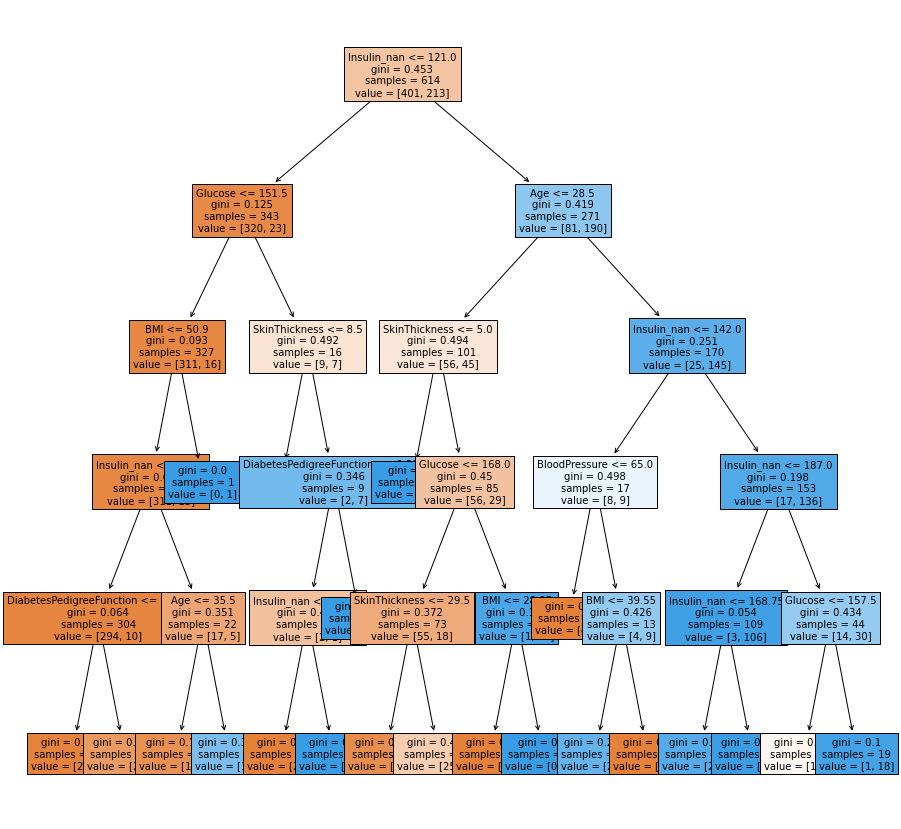

In [38]:
from sklearn.tree import plot_tree

feature_names = X_train.columns.tolist()
plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [39]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## 정확도(Accuracy) 측정하기

In [40]:
abs(y_predict - y_test).sum()

22

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)*100

85.71428571428571